# Diabetes Prediction

In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from livelossplot import PlotLossesKerasTF

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Separate feature and outcome

In [6]:
x=df.drop(columns="Outcome")
y=df.Outcome

#### Split the data

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [8]:
print(x_train.shape)
print(x_test.shape)

(576, 8)
(192, 8)


#### Standardise the data

In [9]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
st.fit(x_train)
st.fit(x_test)
x_train_std=st.transform(x_train)
x_test_std=st.transform(x_test)

In [10]:
x_train_std

array([[ 1.60844143, -0.94968624, -0.26515007, ..., -1.16144088,
        -1.03645536,  0.07191495],
       [-0.89466499, -0.06439359, -0.46266244, ...,  0.25691236,
        -0.67356257, -0.84250027],
       [-1.20755329, -0.88863157,  0.6236556 , ...,  0.13871626,
         0.36327398, -0.47673418],
       ...,
       [ 0.04399992, -0.79704957, -0.11701579, ..., -0.87251707,
        -1.01815824, -1.02538331],
       [ 2.23421803, -1.07179557,  0.32738704, ..., -0.16334045,
        -0.55463131,  0.25479799],
       [ 0.35688822,  0.48509839,  0.72241178, ..., -4.11634347,
         0.48220523,  3.36380972]])

#### Model Building

In [11]:
model=Sequential()
model.add(Input(shape=(8,),name="Input Layer"))
model.add(Dense(10,activation='relu',name="Hidden1"))
model.add(Dense(12,activation='relu',name="Hidden2"))
model.add(Dense(1,activation='sigmoid',name='OutputLayer'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 10)                90        
                                                                 
 Hidden2 (Dense)             (None, 12)                132       
                                                                 
 OutputLayer (Dense)         (None, 1)                 13        
                                                                 
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


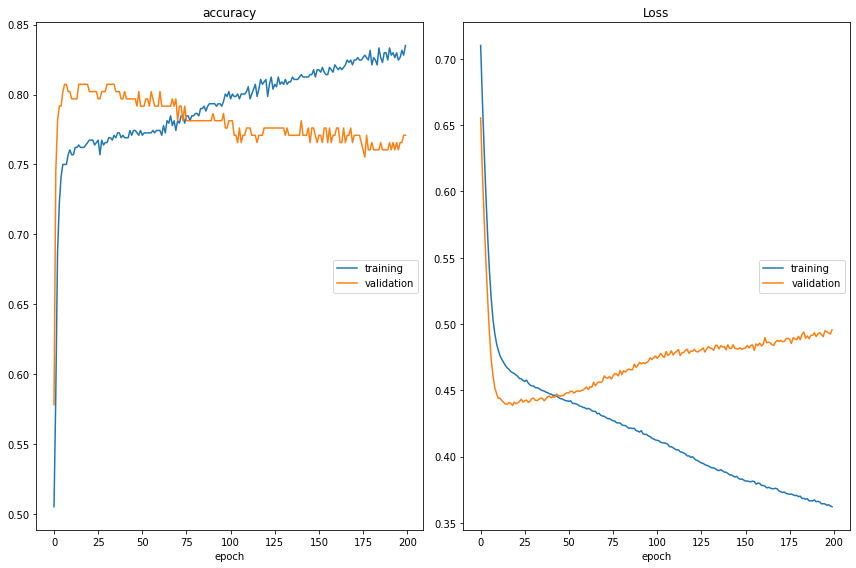

accuracy
	training         	 (min:    0.505, max:    0.835, cur:    0.835)
	validation       	 (min:    0.578, max:    0.807, cur:    0.771)
Loss
	training         	 (min:    0.362, max:    0.710, cur:    0.362)
	validation       	 (min:    0.439, max:    0.656, cur:    0.496)
29/29 [==============================] - 0s 14ms/step - loss: 0.3622 - accuracy: 0.8351 - val_loss: 0.4956 - val_accuracy: 0.7708


In [13]:
model.fit(x_train_std,y_train,epochs=200,batch_size=20, validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

In [14]:
from sklearn.metrics import classification_report

In [15]:
t= model.predict(x_test_std)

In [30]:
# t

In [17]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [18]:
print(len(t))

192


In [19]:
t1 = []
for i in range(len(t)):
    if t[i] >= 0.5:
        t1.append(1)
    else:
        t1.append(0)

In [31]:
# t1

In [21]:
new_pred = pd.Series(t1)  
print(new_pred)

0      1
1      0
2      0
3      1
4      0
      ..
187    0
188    1
189    0
190    0
191    0
Length: 192, dtype: int64


In [22]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: Outcome, Length: 192, dtype: int64

In [23]:
type(y_test)

pandas.core.series.Series

In [24]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       130
           1       0.66      0.60      0.63        62

    accuracy                           0.77       192
   macro avg       0.74      0.73      0.73       192
weighted avg       0.77      0.77      0.77       192



In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,new_pred)

array([[111,  19],
       [ 25,  37]])

In [26]:
conf = confusion_matrix(y_test,new_pred)

tp,fp,fn,tn = confusion_matrix(y_test,new_pred).ravel()
specificity = tn / (tn+fp)
sensitivity= tp / (tp+fn)
print('TP,FP,FN,TN',tp,fp,fn,tn)
print('sensitivity =', sensitivity)
print('specificity =', specificity)

TP,FP,FN,TN 111 19 25 37
sensitivity = 0.8161764705882353
specificity = 0.6607142857142857


In [27]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, new_pred)
print('roc_auc_score is',auc_score1)

roc_auc_score is 0.7253101736972705


# Precison and Recall

In [28]:
# from tensorflow.keras.metrics import Precision, Recall

In [29]:
# model=Sequential()
# model.add(Input(shape=(8,),name="Input Layer"))
# model.add(Dense(10,activation='relu',name="Hidden1"))
# model.add(Dense(12,activation='relu',name="Hidden2"))
# model.add(Dense(1,activation='sigmoid',name='OutputLayer'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',Precision(),Recall()])
# model.fit(x_train_std,y_train,epochs=50,batch_size=20, validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])